<a href="https://colab.research.google.com/github/designer-k/designer-k.github.io/blob/main/Kaggle_Titanic_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Loading Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

In [32]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

**Data Verification**

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Summary information for each column**

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check for missing values and data types**

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


**Data visualization and reading with scatter plot matrices**

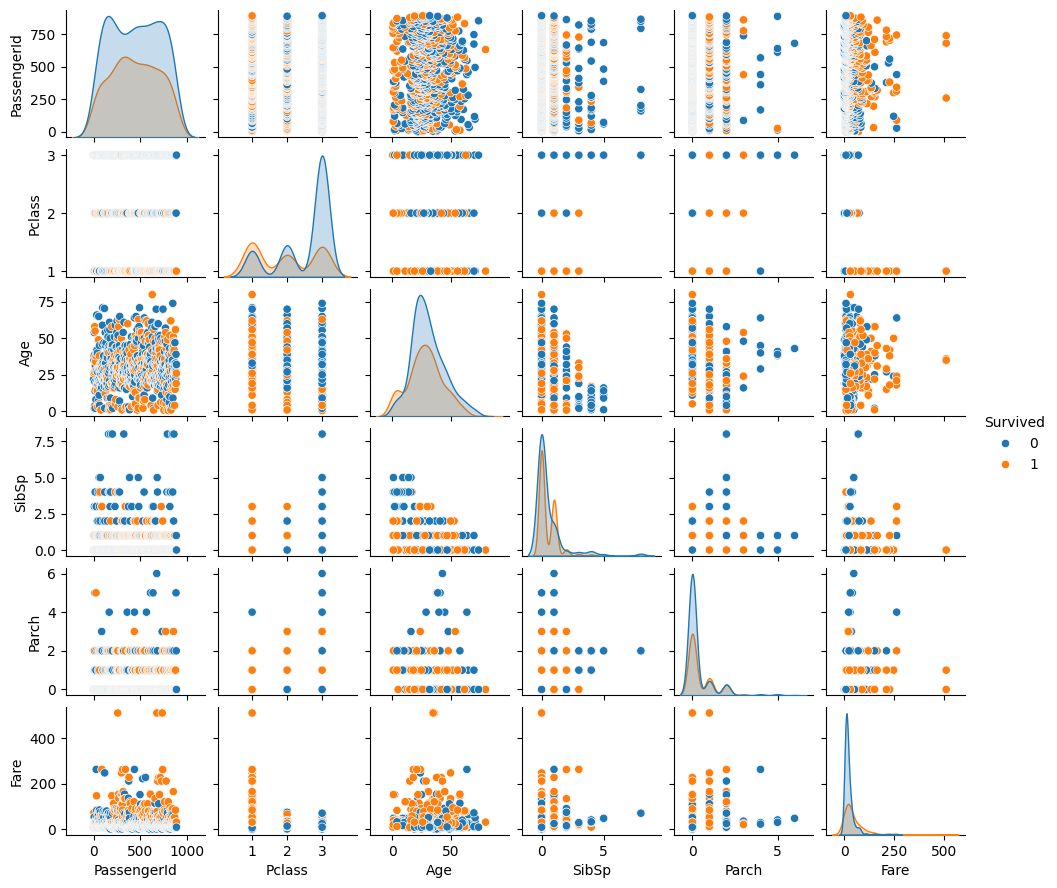

In [ ]:
sns.pairplot(train, hue='Survived', height=1.5, aspect=1.1, diag_kind='kde')

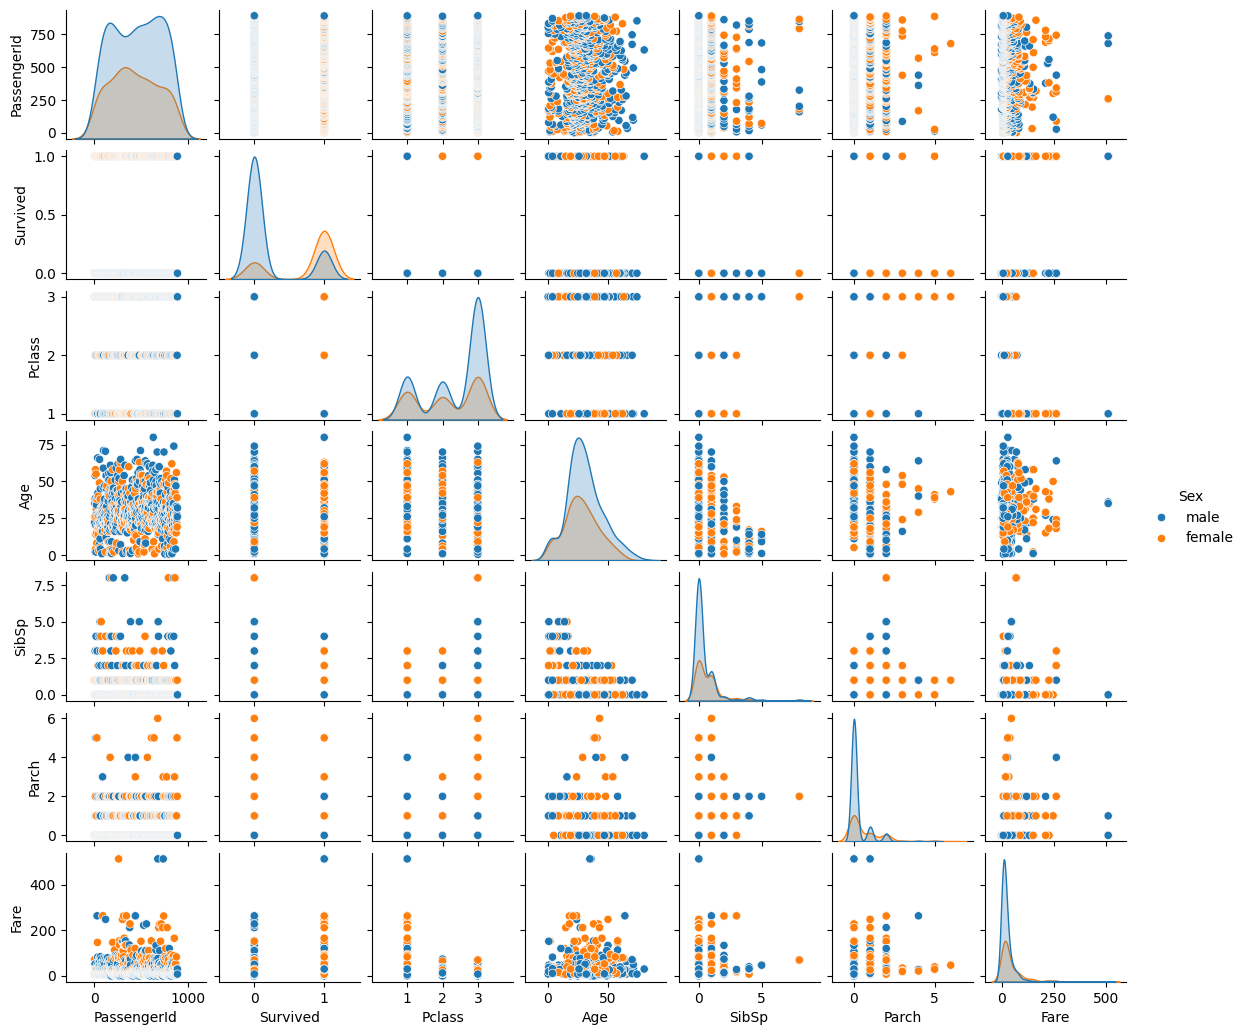

In [ ]:
sns.pairplot(train, hue='Sex', height=1.5, aspect=1.1, diag_kind='kde')

**Creation of features by gender due to differences in the number of survivors by gender.**

In [35]:
train = pd.get_dummies(train, columns=['Sex'])
test = pd.get_dummies(test, columns=['Sex'])

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True


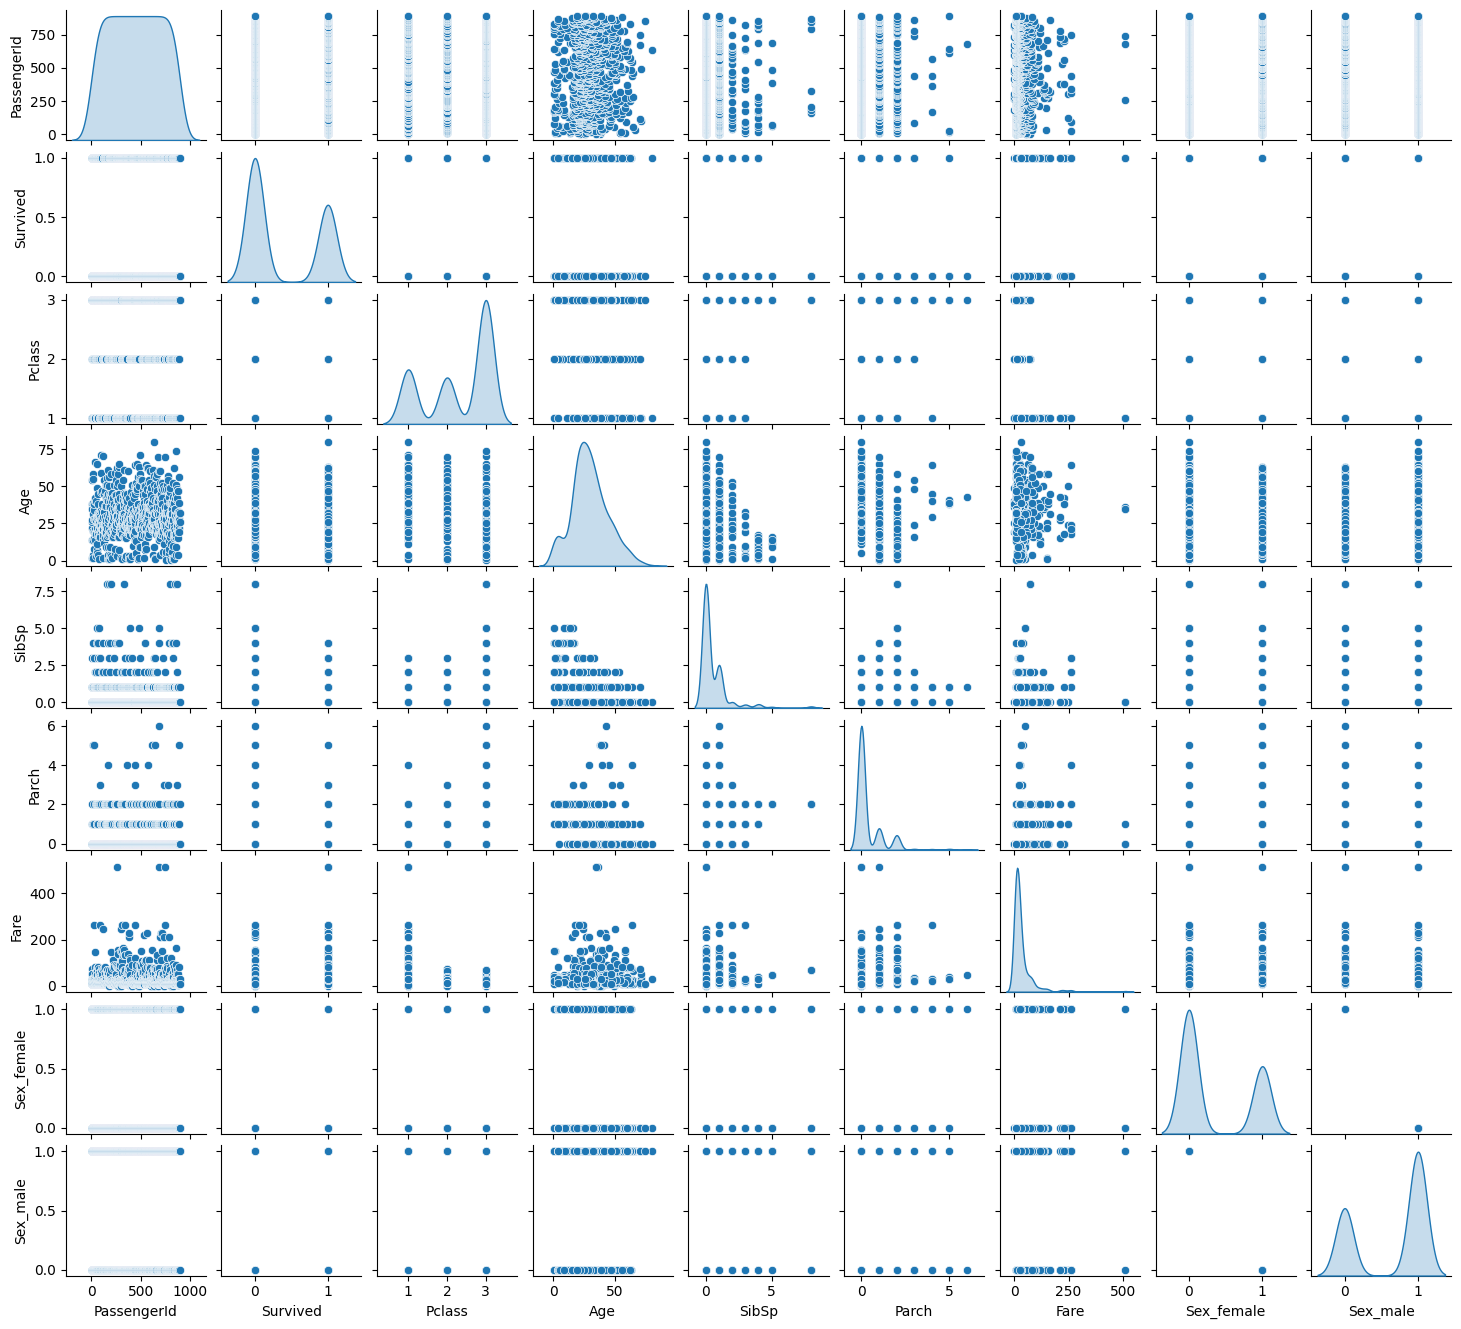

In [ ]:
sns.pairplot(train, height=1.5, aspect=1.1, diag_kind='kde')

**Creation of data narrowed down to survivors in order to ascertain information on survivors.**

In [ ]:
survived = train[train['Survived'] == 1]

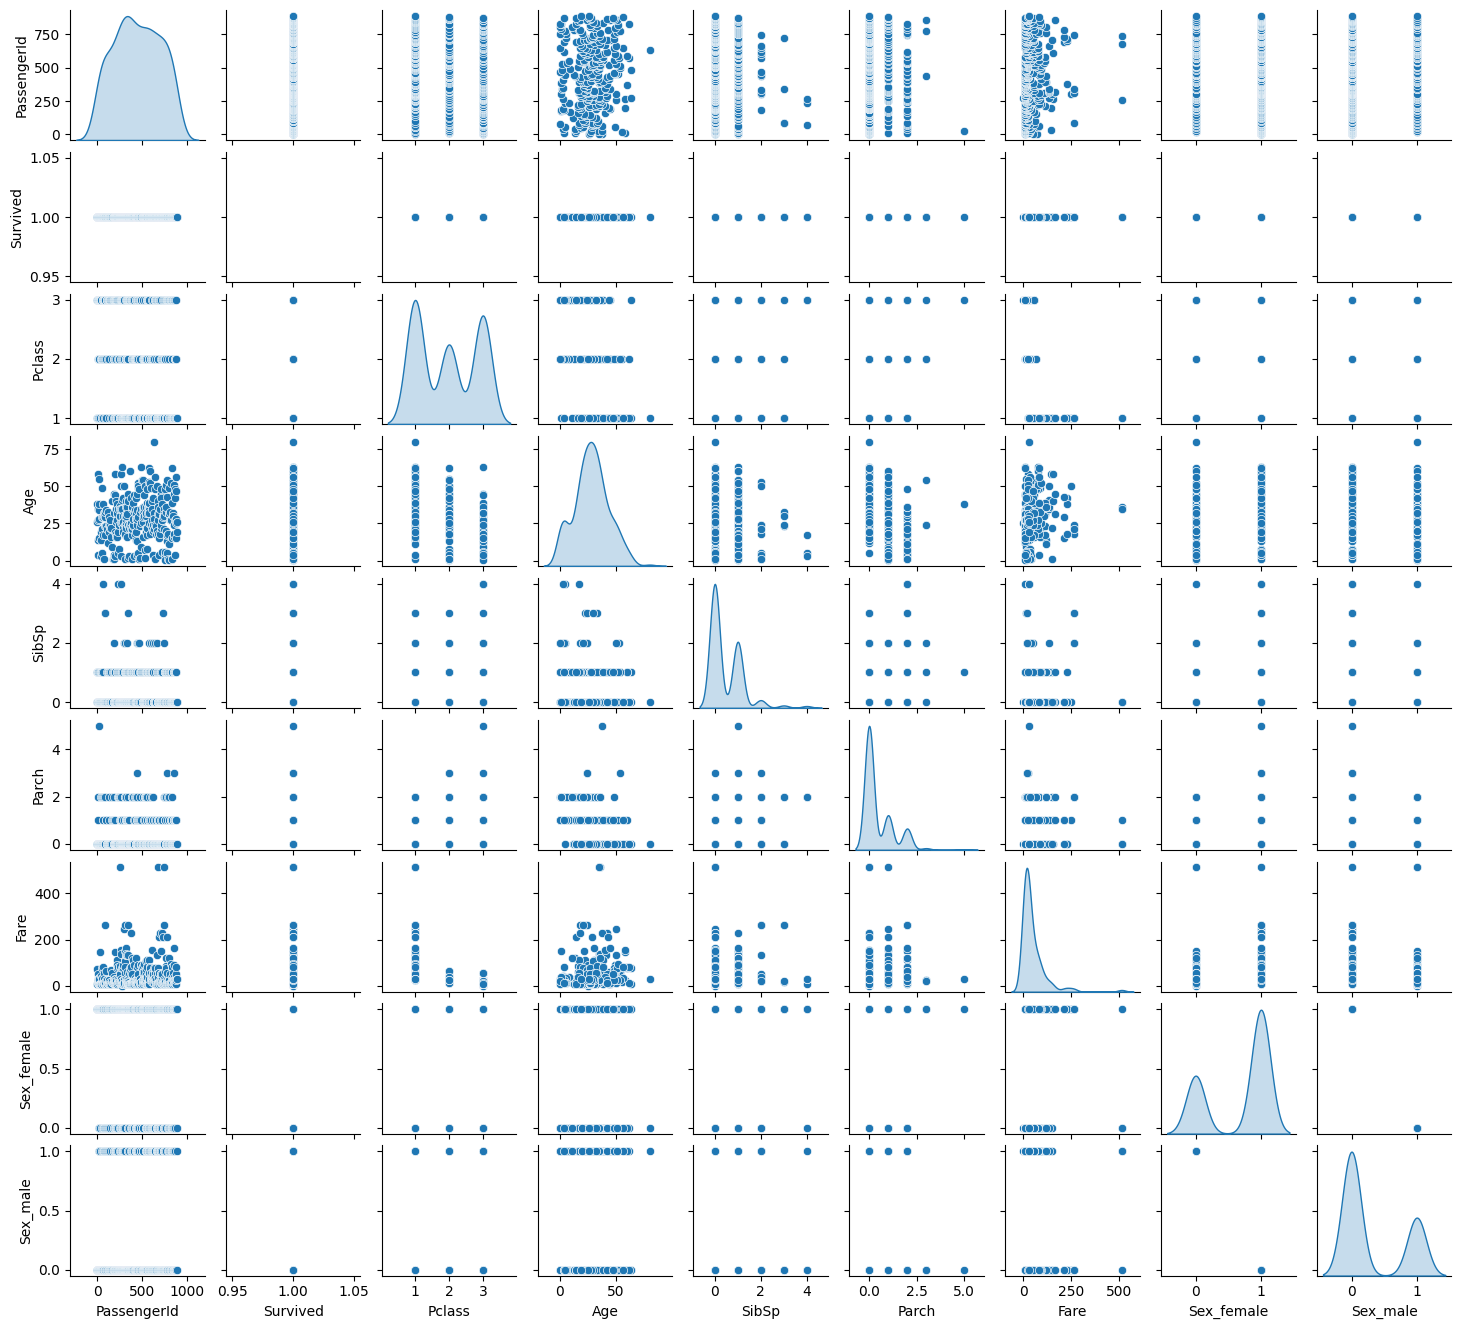

In [ ]:
sns.pairplot(survived, height=1.5, aspect=1.1, diag_kind='kde')

**Loading libraries for machine learning**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

**Because there is a missing value for age, data without missing values is learned to predict and supplement the missing value.**

In [36]:
# train = train.drop('Name', axis=1)
# train = train.drop('Ticket', axis=1)
# train = train.drop('Cabin', axis=1)
# train = train.drop('Embarked', axis=1)

exclude_columns = ['Name', 'Ticket', 'Cabin', 'Embarked']

# 欠損値のないデータでモデルを学習
train_notna = train.dropna(subset=['Age'])
X_train = train_notna.drop(['Age'] + exclude_columns, axis=1)
y_train = train_notna['Age']
model = LinearRegression()
model.fit(X_train, y_train)

# 欠損値を予測して補完
# X_test = train[train['Age'].isnull()].drop(['Age'], axis=1)
# predicted_ages = model.predict(X_test)
# train.loc[train['Age'].isnull(), 'Age'] = predicted_ages

X_test = train[train['Age'].isnull()].drop(['Age'] + exclude_columns, axis=1)
predicted_ages = model.predict(X_test)
train.loc[train['Age'].isnull(), 'Age'] = predicted_ages

In [31]:
print(train.head())  # DataFrame の先頭5行を表示
print(train.columns)  # 列名を表示

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Sex_female  \
0  22.0      1      0         A/5 21171   7.2500   NaN        S       False   
1  38.0      1      0          PC 17599  71.2833   C85        C        True   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S        True   
3  35.0      1      0            113803  53.1000  C123        S        True   
4  35.0      0      0            373450   8.0500   NaN        S       False   

   Sex_male  
0      True  
1     False  
2     False  
3     

**To confirm accuracy in machine learning, we compared the results with logistic regression, decision trees, and random forests, respectively.**

In [37]:
# 説明変数と目的変数を準備
y = train['Survived']  # 目的変数 # この行を先頭に移動
train = train.drop(['Survived'], axis=1) # その後列を削除
X = train.drop(exclude_columns, axis=1)  # 説明変数


# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ロジスティック回帰
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', accuracy_lr)

# 決定木
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# ランダムフォレスト
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8208955223880597
Decision Tree Accuracy: 0.7611940298507462
Random Forest Accuracy: 0.8208955223880597


**Since the accuracy of the random forest was the best, cross-validation was used to find hyper-parameters and improve accuracy.**

In [38]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(random_state=1234) #初期化

# パラメータの候補を設定
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCVを使って最適なパラメータを探索
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータとスコアを表示
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 最適なパラメータでモデルを再学習
best_rf = grid_search.best_estimator_

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score:  0.8266709677419355


**Adapted to test data to confirm accuracy**

In [39]:
# 最適化されたモデルで予測
y_pred_best = best_rf.predict(X_test)

# 精度の計算 (テストデータに真の値があると仮定)
accuracy_best = accuracy_score(y_test, y_pred_best)  # y_testはテストデータの真の値
print('Test Accuracy (Optimized):', accuracy_best)

Test Accuracy (Optimized): 0.8246268656716418


[Result]

Random forest: 0.8266

Test data: 0.8246

The relatively small difference between the accuracy of the training data and the test data suggests that the model is not over-trained and is able to predict with some accuracy for unknown data.

In [43]:
print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)
print("y_pred_best length:", len(y_pred_best))

Training data shape: (891, 12)
Testing data shape: (418, 12)
y_pred_best length: 268


In [42]:
y_pred_best = best_rf.predict(X_test)

In [41]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred_best})

ValueError: array length 268 does not match index length 418

In [ ]:
# test = test.drop('Ticket', axis=1)
# test = test.drop('Cabin', axis=1)
# test = test.drop('Embarked', axis=1)

# train = train.drop('Survived',axis=1)
# 提出用のデータフレームを作成
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred_best})

ValueError: array length 268 does not match index length 418

In [ ]:
# 'test_original' は変更前の元のテストデータであると仮定します
submission = pd.DataFrame({'PassengerId': test_original['PassengerId'], 'Survived': y_pred_best})

NameError: name 'test_original' is not defined

In [ ]:
train = train.drop(['Survived'], axis=1)

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred_best})

ValueError: array length 268 does not match index length 418

In [ ]:
# y_pred_best を test['PassengerId'] の長さに合わせてトリミングまたはパディングする
y_pred_best = y_pred_best[:len(test['PassengerId'])]  # 185 にトリミング

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred_best})

ValueError: array length 268 does not match index length 418

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Sex_female   418 non-null    bool   
 11  Sex_male     418 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 33.6+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Sex_female   891 non-null    bool   
 11  Sex_male     891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 71.5+ KB


In [ ]:
# CSVファイルに保存
submission.to_csv('submission.csv', index=False)

NameError: name 'submission' is not defined

In [ ]:
exclude_columns = ['Name', 'Ticket', 'Cabin', 'Embarked']
X_test = test.drop(exclude_columns, axis=1)  # テストデータにも同じ列を除外

# ... (y_pred_best を生成する処理)

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred_best})

ValueError: array length 268 does not match index length 418